## Project Proposal: Music Analysis and Classification

To start with music classification, one possible first step is to look at the features from the python library librosa which provides ways to __extract features from audio signals__ (the snippets below are taken from the documentation). This should give you the first necessary tools to work with your own songs later on

In [9]:
# Estimate a static tempo

import soundfile as sf
import librosa
import numpy as np


y, sr = sf.read(librosa.util.example_audio_file())
print(y.shape)

librosa.output.write_wav("testSound.wav", y.T, sr)


(2710336, 2)


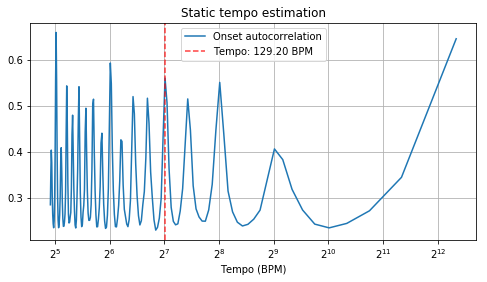

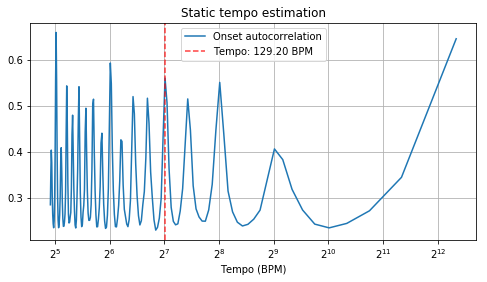

In [17]:
onset_env = librosa.onset.onset_strength(y[:,1], sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)


import matplotlib.pyplot as plt
# Convert to scalar
tempo = np.asscalar(tempo)
# Compute 2-second windowed autocorrelation
hop_length = 512
ac = librosa.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = librosa.tempo_frequencies(len(ac), sr=sr,hop_length=hop_length)
# Plot on a BPM axis.  We skip the first (0-lag) bin.
plt.figure(figsize=(8,4))
plt.semilogx(freqs[1:], librosa.util.normalize(ac)[1:],label='Onset autocorrelation', basex=2)
plt.axvline(tempo, 0, 1, color='r', alpha=0.75, linestyle='--',label='Tempo: {:.2f} BPM'.format(tempo))
plt.xlabel('Tempo (BPM)')
plt.grid()
plt.title('Static tempo estimation')
plt.legend(frameon=True)
plt.axis('tight')
plt.show()

In [ ]:
# Compare the figure to the 'testSound.wav' file you stored on your computer.
# Try to do the same with your own song and extract additional features. Use the load function from librosa

In [ ]:
y, sr = librosa.load(filename)

In [ ]:
# Then try to extract various features from your song using the functions from librosa. A commonly used (spectral) 
# feature to compare sounds is the Mel-frequency cepstral coefficients (MFCCs). compute that feature for your song 
# and plot the result following the steps in https://librosa.github.io/librosa/generated/librosa.feature.mfcc.html#librosa.feature.mfcc
